<a href="https://colab.research.google.com/github/RajivRanganath/DLRL/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()


In [ ]:
import zipfile

with zipfile.ZipFile("archive.zip", "r") as zip_ref:
    zip_ref.extractall("data_folder")  # Extracts to a folder named data_folder


In [ ]:
import os

os.listdir("data_folder")


['netflix_titles.csv']

In [ ]:
import pandas as pd

df = pd.read_csv("data_folder/netflix_titles.csv")  # Use the correct filename from the output above
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.isnull().sum()

df['country'] = df['country'].fillna("Unknown")
df['date_added'] = df['date_added'].fillna("Unknown")
df['rating'] = df['rating'].fillna("Not Rated")

df.drop_duplicates(inplace=True)
df[['country', 'date_added', 'rating']].head(10)


,country,date_added,rating
0,United States,"September 25, 2021",PG-13
1,South Africa,"September 24, 2021",TV-MA
2,Unknown,"September 24, 2021",TV-MA
3,Unknown,"September 24, 2021",TV-MA
4,India,"September 24, 2021",TV-MA
5,Unknown,"September 24, 2021",TV-MA
6,Unknown,"September 24, 2021",PG
7,"United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",TV-MA
8,United Kingdom,"September 24, 2021",TV-14
9,United States,"September 24, 2021",PG-13


In [ ]:
import pandas as pd

df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')


df['year_added'] = df['date_added'].dt.year


type_counts = df['type'].value_counts()


print("First 5 dates after conversion:")
print(df['date_added'].head())

print("\nFirst 5 rows of 'date_added' and 'year_added':")
print(df[['date_added', 'year_added']].head())

print("\nCount of each content type:")
print(type_counts)


First 5 dates after conversion:
0   2021-09-25
1   2021-09-24
2   2021-09-24
3   2021-09-24
4   2021-09-24
Name: date_added, dtype: datetime64[ns]

First 5 rows of 'date_added' and 'year_added':
  date_added  year_added
0 2021-09-25      2021.0
1 2021-09-24      2021.0
2 2021-09-24      2021.0
3 2021-09-24      2021.0
4 2021-09-24      2021.0

Count of each content type:
type
Movie      6131
TV Show    2676
Name: count, dtype: int64


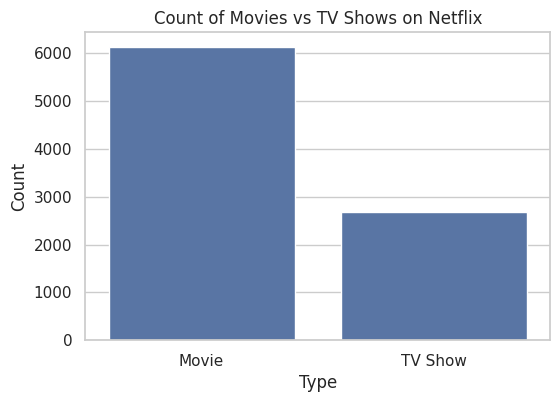

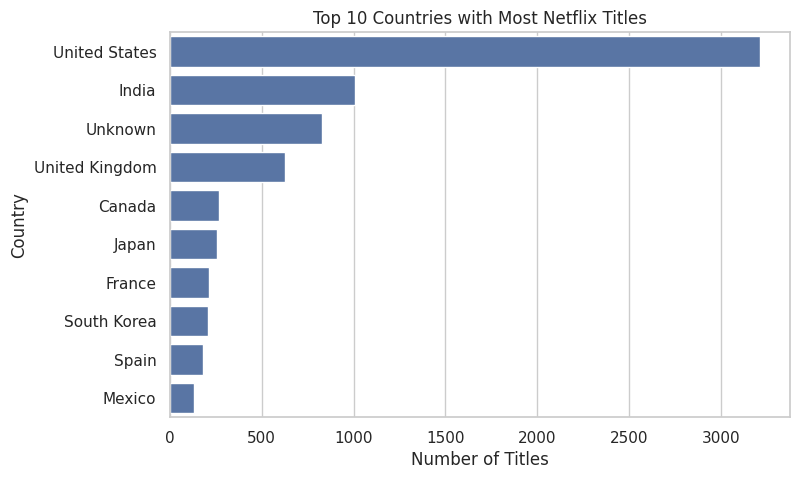

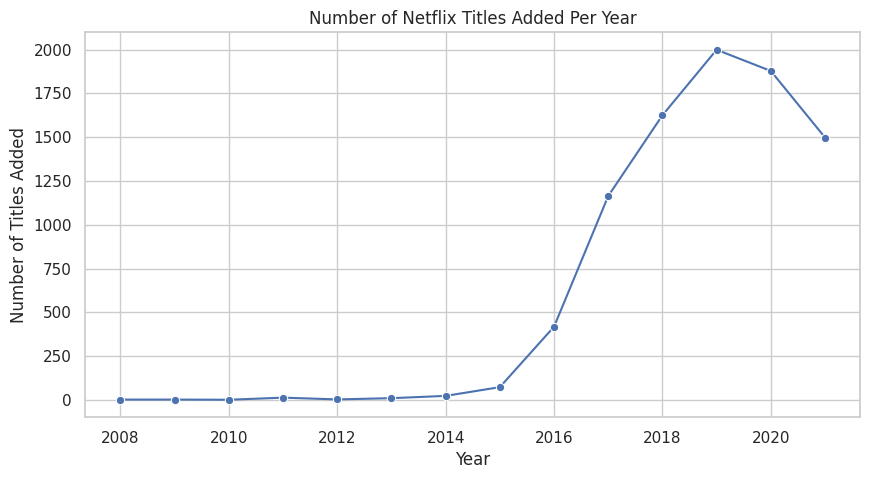

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='type')
plt.title("Count of Movies vs TV Shows on Netflix")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()
print("\n\n")

df['main_country'] = df['country'].apply(lambda x: x.split(',')[0].strip() if pd.notnull(x) else "Unknown")
top_countries = df['main_country'].value_counts().head(10)

plt.figure(figsize=(8, 5))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Top 10 Countries with Most Netflix Titles")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()
print("\n\n")


yearly_counts = df['year_added'].dropna().value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, marker='o')
plt.title("Number of Netflix Titles Added Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Titles Added")
plt.grid(True)
plt.show()
print("\n\n")

